In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

madimba tz
hermanus za
carnarvon au
jamestown sh
butaritari ki
kodiak us
ribeira grande pt
buluang ph
rikitea pf
sao joao da barra br
thinadhoo mv
oksfjord no
palabuhanratu id
humaita br
bambanglipuro id
mokhsogollokh ru
dunedin nz
rikitea pf
punta arenas cl
partenit ua
lebu cl
hilo us
kodiak us
saint-augustin ca
olafsvik is
rikitea pf
illoqqortoormiut gl
vaitupu wf
cape town za
jumla np
balkhash kz
albany au
tuatapere nz
rongcheng cn
arlit ne
busselton au
belushya guba ru
narsaq gl
rikitea pf
jaszszentandras hu
hambantota lk
flin flon ca
jamestown sh
rikitea pf
waddan ly
kununurra au
popondetta pg
butaritari ki
kirkwall gb
bar bigha in
ribeira grande pt
nikolskoye ru
clyde river ca
butaritari ki
atuona pf
brae gb
mahebourg mu
mnogovershinnyy ru
ajdabiya ly
oussouye sn
okhotsk ru
hermanus za
vaini to
vestmannaeyjar is
atikokan ca
kutum sd
itarema br
vaini to
vaini to
busselton au
newburn gb
ketchikan us
puerto ayora ec
saint-philippe re
camabatela ao
ushuaia ar
albany au
paramonga pe
b

hithadhoo mv
busselton au
itarema br
kodiak us
punta arenas cl
lebu cl
almaznyy ru
samarai pg
bonthe sl
buckingham ca
bengkulu id
bandipur in
castro cl
busselton au
atuona pf
bull savanna jm
vaini to
awjilah ly
bluff nz
rikitea pf
barrow us
la ronge ca
pafos cy
chuy uy
salalah om
jalu ly
hokitika nz
cape town za
mataura pf
hithadhoo mv
ilulissat gl
ushuaia ar
bethel us
qaanaaq gl
deputatskiy ru
port lincoln au
sao filipe cv
tarakan id
imbituba br
belaya gora ru
tuktoyaktuk ca
ushuaia ar
valverde del camino es
shahdol in
yulara au
cap-aux-meules ca
baykit ru
inderborskiy kz
havre-saint-pierre ca
rio grande br
santa luzia br
hermanus za
planaltina br
saldanha za
rikitea pf
vaitupu wf
ribeira grande pt
cururupu br
biu ng
namatanai pg
kot samaba pk
lebu cl
marrakesh ma
jamestown sh
chadiza zm
barrow us
luderitz na
norman wells ca
cockburn town bs
atuona pf
namtsy ru
cape town za
hobart au
kapaa us
navahrudak by
rikitea pf
barcelona ph
cururupu br
jamestown sh
albany au
saskylakh ru
busselt

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

618

In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [11]:
#Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | madimba
Processing Record 2 of Set 13 | hermanus
Processing Record 3 of Set 13 | carnarvon
Processing Record 4 of Set 13 | jamestown
Processing Record 5 of Set 13 | butaritari
Processing Record 6 of Set 13 | kodiak
Processing Record 7 of Set 13 | ribeira grande
Processing Record 8 of Set 13 | buluang
Processing Record 9 of Set 13 | rikitea
Processing Record 10 of Set 13 | sao joao da barra
Processing Record 11 of Set 13 | thinadhoo
Processing Record 12 of Set 13 | oksfjord
Processing Record 13 of Set 13 | palabuhanratu
City not found. Skipping...
Processing Record 14 of Set 13 | humaita
Processing Record 15 of Set 13 | bambanglipuro
Processing Record 16 of Set 13 | mokhsogollokh
Processing Record 17 of Set 13 | dunedin
Processing Record 18 of Set 13 | punta arenas
Processing Record 19 of Set 13 | partenit
Processing Record 20 of Set 13 | lebu
Processing Record 21 of Set 13 | hilo
Processing Reco

Processing Record 37 of Set 16 | kapaa
Processing Record 38 of Set 16 | kamenskoye
City not found. Skipping...
Processing Record 39 of Set 16 | jangipur
Processing Record 40 of Set 16 | leshan
Processing Record 41 of Set 16 | haines junction
Processing Record 42 of Set 16 | matara
Processing Record 43 of Set 16 | karpuninskiy
City not found. Skipping...
Processing Record 44 of Set 16 | deputatskiy
Processing Record 45 of Set 16 | pisco
Processing Record 46 of Set 16 | sabang
Processing Record 47 of Set 16 | san angelo
Processing Record 48 of Set 16 | mandera
Processing Record 49 of Set 16 | kiunga
Processing Record 50 of Set 16 | limaong
Processing Record 1 of Set 17 | langcangan
Processing Record 2 of Set 17 | nilakkottai
Processing Record 3 of Set 17 | bambous virieux
Processing Record 4 of Set 17 | polazna
Processing Record 5 of Set 17 | daltenganj
Processing Record 6 of Set 17 | kilindoni
Processing Record 7 of Set 17 | kieta
Processing Record 8 of Set 17 | erzin
Processing Record 

Processing Record 18 of Set 20 | dingle
Processing Record 19 of Set 20 | gat
Processing Record 20 of Set 20 | lasa
Processing Record 21 of Set 20 | agadez
Processing Record 22 of Set 20 | arman
Processing Record 23 of Set 20 | moree
Processing Record 24 of Set 20 | kota kinabalu
Processing Record 25 of Set 20 | naifaru
Processing Record 26 of Set 20 | tondano
Processing Record 27 of Set 20 | zharkent
Processing Record 28 of Set 20 | northam
Processing Record 29 of Set 20 | wanning
Processing Record 30 of Set 20 | port hawkesbury
Processing Record 31 of Set 20 | magnolia
Processing Record 32 of Set 20 | vao
Processing Record 33 of Set 20 | wana
Processing Record 34 of Set 20 | menongue
Processing Record 35 of Set 20 | ngunguru
Processing Record 36 of Set 20 | saint-georges
Processing Record 37 of Set 20 | dumas
Processing Record 38 of Set 20 | tatawin
Processing Record 39 of Set 20 | westport
Processing Record 40 of Set 20 | antofagasta
Processing Record 41 of Set 20 | kamenka
Processin

Processing Record 8 of Set 24 | bilma
Processing Record 9 of Set 24 | karasjok
Processing Record 10 of Set 24 | ambulu
Processing Record 11 of Set 24 | tazovskiy
Processing Record 12 of Set 24 | wolomin
Processing Record 13 of Set 24 | port-gentil
Processing Record 14 of Set 24 | poronaysk
Processing Record 15 of Set 24 | ariquemes
Processing Record 16 of Set 24 | manzil salim
Processing Record 17 of Set 24 | kavaratti
Processing Record 18 of Set 24 | eisenerz
Processing Record 19 of Set 24 | shwebo
Processing Record 20 of Set 24 | wheat ridge
Processing Record 21 of Set 24 | huntsville
Processing Record 22 of Set 24 | banepa
Processing Record 23 of Set 24 | san carlos de bariloche
Processing Record 24 of Set 24 | kundiawa
Processing Record 25 of Set 24 | wilmington
Processing Record 26 of Set 24 | san jeronimo
Processing Record 27 of Set 24 | champasak
Processing Record 28 of Set 24 | santarem
Processing Record 29 of Set 24 | khash
Processing Record 30 of Set 24 | bow island
Processin

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Madimba,-10.4000,40.3333,81.72,74,40,16.11,TZ,2021-10-31 15:34:27
1,Hermanus,-34.4187,19.2345,69.91,85,95,8.97,ZA,2021-10-31 15:34:28
2,Carnarvon,-24.8667,113.6333,68.07,73,90,17.27,AU,2021-10-31 15:34:28
3,Jamestown,42.0970,-79.2353,52.09,99,90,4.00,US,2021-10-31 15:34:29
4,Butaritari,3.0707,172.7902,80.85,78,37,9.31,KI,2021-10-31 15:34:30
5,Kodiak,57.7900,-152.4072,45.91,87,90,17.27,US,2021-10-31 15:34:30
6,Ribeira Grande,38.5167,-28.7000,70.20,88,75,11.50,PT,2021-10-31 15:34:30
7,Buluang,13.3068,123.3425,74.10,90,46,3.69,PH,2021-10-31 15:34:31
8,Rikitea,-23.1203,-134.9692,74.05,88,100,18.12,PF,2021-10-31 15:32:06
9,Sao Joao Da Barra,-21.6403,-41.0511,77.09,82,100,12.68,BR,2021-10-31 15:34:31


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

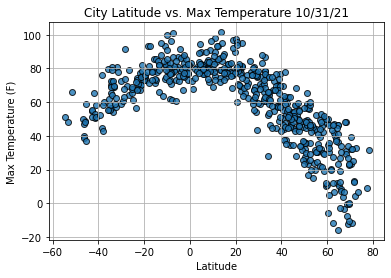

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

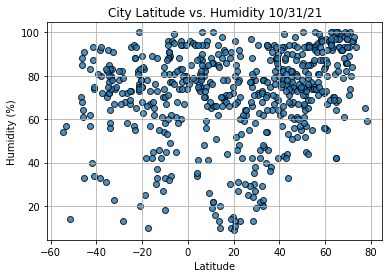

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

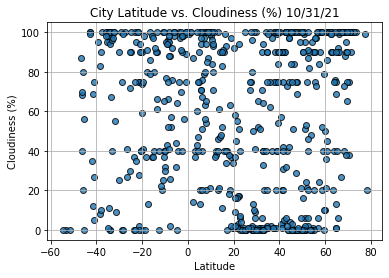

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

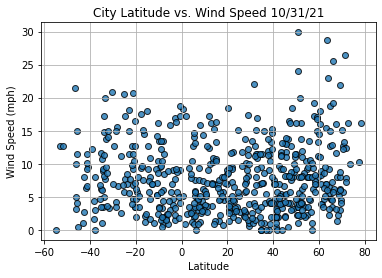

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [23]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
index13 = city_data_df.loc[13]

In [25]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3       True
4       True
       ...  
569     True
570    False
571     True
572     True
573     True
Name: Lat, Length: 574, dtype: bool

In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,Jamestown,42.0970,-79.2353,52.09,99,90,4.00,US,2021-10-31 15:34:29
4,Butaritari,3.0707,172.7902,80.85,78,37,9.31,KI,2021-10-31 15:34:30
5,Kodiak,57.7900,-152.4072,45.91,87,90,17.27,US,2021-10-31 15:34:30
6,Ribeira Grande,38.5167,-28.7000,70.20,88,75,11.50,PT,2021-10-31 15:34:30
7,Buluang,13.3068,123.3425,74.10,90,46,3.69,PH,2021-10-31 15:34:31
...,...,...,...,...,...,...,...,...,...
568,Bad Hofgastein,47.1667,13.1000,59.32,87,29,8.16,AT,2021-10-31 15:38:22
569,Hami,42.8000,93.4500,51.12,42,32,4.88,CN,2021-10-31 15:38:22
571,Carman,49.4992,-98.0016,36.72,75,21,11.50,CA,2021-10-31 15:38:23
572,Champerico,14.3000,-91.9167,87.35,70,48,0.96,GT,2021-10-31 15:38:24


In [27]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,Jamestown,42.0970,-79.2353,52.09,99,90,4.00,US,2021-10-31 15:34:29
4,Butaritari,3.0707,172.7902,80.85,78,37,9.31,KI,2021-10-31 15:34:30
5,Kodiak,57.7900,-152.4072,45.91,87,90,17.27,US,2021-10-31 15:34:30
6,Ribeira Grande,38.5167,-28.7000,70.20,88,75,11.50,PT,2021-10-31 15:34:30
7,Buluang,13.3068,123.3425,74.10,90,46,3.69,PH,2021-10-31 15:34:31


In [28]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

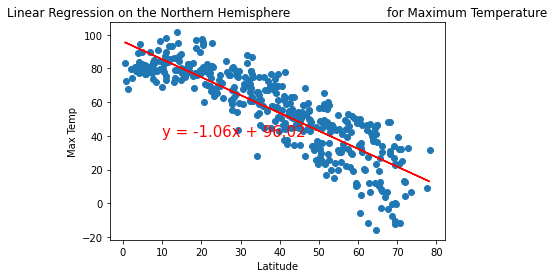

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

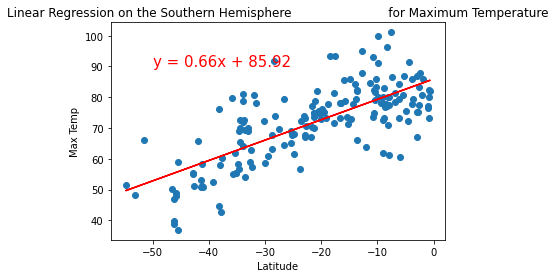

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

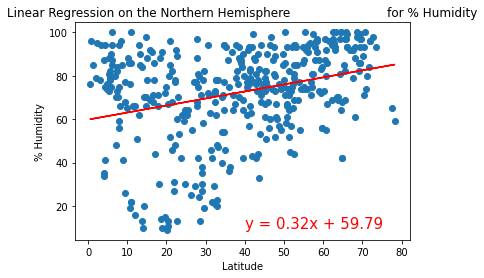

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

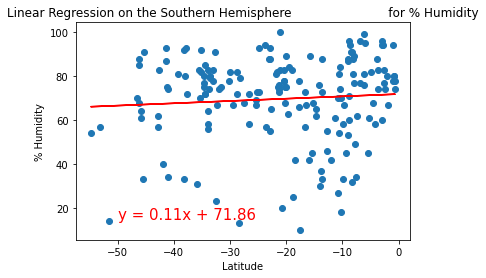

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

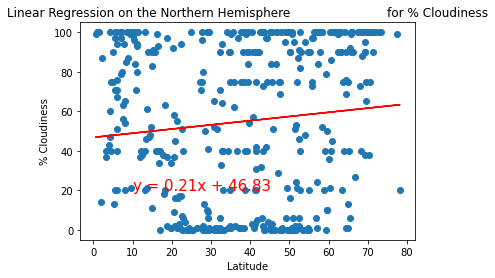

In [42]:
# Linear regression on the Northen Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,20))

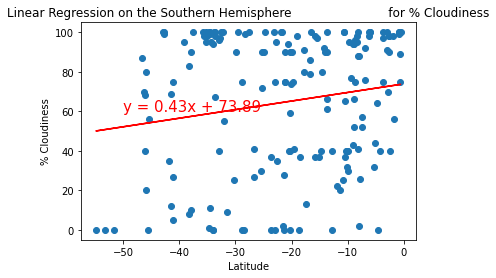

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))


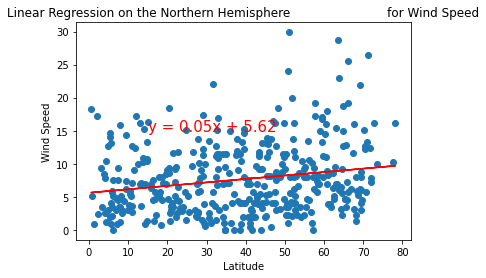

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(15,15))

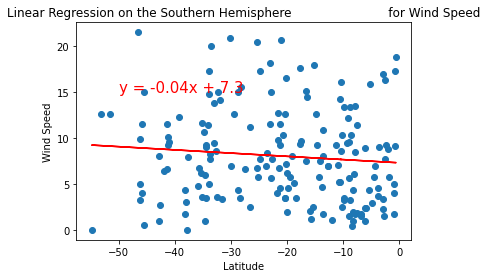

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,15))